In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("/content/weather.csv")
dataset.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
dataset = dataset.iloc[:,[2,3]]
dataset.head()

,Rainfall,Evaporation
0,0.0,3.4
1,3.6,4.4
2,3.6,5.8
3,39.8,7.2
4,2.8,5.6


In [ ]:
dataset.isna().any()

Rainfall       False
Evaporation    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


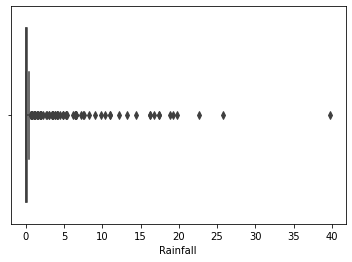

In [ ]:
sb.boxplot(dataset.iloc[:,0])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


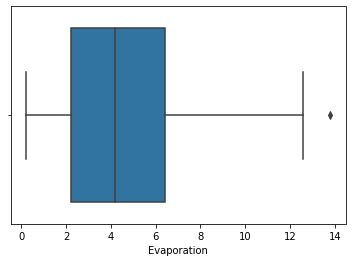

In [ ]:
sb.boxplot(dataset.iloc[:,1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


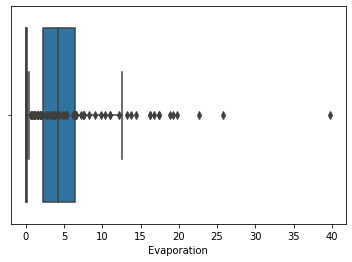

In [ ]:
count =0
for i in dataset.iloc[:,0]:
  if i<=-13:
    dataset = dataset.drop(count,0)
    count+=1
dataset = dataset.reset_index(drop=True)
sb.boxplot(dataset.iloc[:,0])
sb.boxplot(dataset.iloc[:,1])

In [ ]:
dataset= dataset.drop_duplicates()
dataset = dataset.reset_index(drop=True)
print(dataset)

     Rainfall  Evaporation
0         0.0          3.4
1         3.6          4.4
2         3.6          5.8
3        39.8          7.2
4         2.8          5.6
..        ...          ...
143      13.2          6.6
144       0.6          3.4
145       0.2          7.6
146       0.8          4.8
147       0.0         11.6

[148 rows x 2 columns]


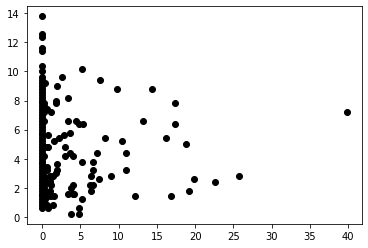

In [ ]:
plt.scatter(dataset.iloc[0:148,0],dataset.iloc[0:148,1],color="black")

In [ ]:
from sklearn.model_selection import train_test_split
x =dataset.iloc[: , 0:1]
y = dataset.iloc[:,1:2]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(103, 1)
(45, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
regressed = LinearRegression()
regressed.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction  = regressed.predict(x_test)
print(prediction)

[[4.80213001]
 [4.5204887 ]
 [4.82960721]
 [4.18389299]
 [4.82960721]
 [4.23197809]
 [4.80899931]
 [4.78839141]
 [4.82273791]
 [4.82960721]
 [4.82960721]
 [4.76778351]
 [4.82273791]
 [4.69222121]
 [4.70595981]
 [4.82960721]
 [4.75404491]
 [4.79526071]
 [4.82960721]
 [4.33501759]
 [4.82960721]
 [4.66474401]
 [4.82273791]
 [4.79526071]
 [4.82960721]
 [4.5479659 ]
 [4.5823124 ]
 [4.82960721]
 [4.6166589 ]
 [4.82960721]
 [4.4105799 ]
 [4.77465281]
 [4.80899931]
 [4.82960721]
 [4.6097896 ]
 [4.76778351]
 [4.69222121]
 [4.82273791]
 [4.82960721]
 [4.82960721]
 [4.23197809]
 [4.80213001]
 [4.4517957 ]
 [4.80899931]
 [4.81586861]]


In [ ]:
predictiondata = pd.DataFrame(prediction,columns=["Predicted"])
x = [predictiondata, y_test]
result = pd.concat(x, axis=1)
result.head(5)

,Predicted,Evaporation
0,4.802130,3.4
1,4.520489,4.4
2,4.829607,NaN
3,4.183893,NaN
4,4.829607,NaN


In [ ]:
result['Evaporation'].isna().any()

True

In [ ]:
result['Evaporation'].dropna()

0       3.4
1       4.4
5       5.8
6       4.2
8       4.0
12      7.2
14      8.8
15      8.4
17      7.4
22      4.4
24      6.6
34      4.8
42      7.8
45      8.8
47     11.4
50      7.4
51      9.0
52     10.0
58      5.0
59      1.4
63      5.4
64      8.0
65      2.8
68      3.2
80      2.8
93      4.4
94      1.8
97      3.0
98      1.8
101     1.2
108     2.2
112     0.6
116     1.4
122     2.2
128     1.6
131     1.4
132     5.4
133     2.2
135     2.4
137     5.2
139     6.4
142     5.4
144     3.4
145     7.6
146     4.8
Name: Evaporation, dtype: float64

In [ ]:
result.head(5)

,Predicted,Evaporation
0,4.802130,3.4
1,4.520489,4.4
2,4.829607,NaN
3,4.183893,NaN
4,4.829607,NaN


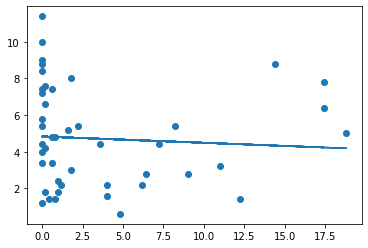

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, prediction)